# Predictive analysis of stroke risk factors and contributors

---



## Reading the CSV file 

In [6]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
#reading the csv file 

data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning Data 

In [8]:
#data´s info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.shape

(5110, 12)

The data frame has 5,110 rows and 12 columns

In [10]:
#possible duplicates
data.duplicated().value_counts()

False    5110
dtype: int64

According to the operation above, we found that there are not duplicated values 

In [11]:
#
data['gender'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

Female    58.59%
Male      41.39%
Other      0.02%
Name: gender, dtype: object

<Axes: xlabel='gender'>

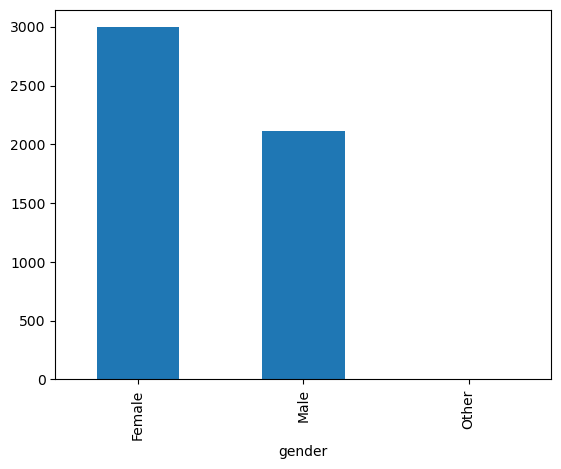

In [12]:
#plot by gender
data.groupby('gender')['gender'].count().plot(kind='bar')

Because we only have one record of "other", we are not able to do a complete general analysis based on one sample.

In [13]:
#for cleaning, we are going to drop the "other" value
data = data[data['gender']!='Other']
data.shape

(5109, 12)

In [14]:
#Checking for NA values

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We decided to drop the missing values to ensure our data is uniform, due to the minimum impact (0.4%) on patient records. 

In [15]:
#With the "isnull" we can see if there are any NA values in the data frame, in this case the column bmi has 201 NA values
#drop NA
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
#make the id column the index
data = data.set_index('id').sort_values('id', ascending=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0


In [17]:
#Statistics summary of avg glucose level and bmi(Body Mass Index)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Creating a new csv file with the cleaned data 

In [18]:
data.to_csv('./data/dataset_stroke.csv')

In [19]:
import pandas as pd

In [20]:
data_new = pd.read_csv('./data/dataset_stroke.csv')
data_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
3,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
4904,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
4905,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
4906,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


In [21]:
#table with just the number of strokes
stroke = data_new[data_new['stroke']==1]

# In what range of age is a person most likely to have a stroke? 

In [109]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# First we collect each different age group

data_new['age'].value_counts().sort_values()

0     19
6     23
7     31
10    34
4     34
      ..
54    84
52    85
2     88
57    93
78    93
Name: age, Length: 83, dtype: int64

In [144]:
# We get the count of people that have had a stroke next to their age

target_value=1
stroke=data_new[data_new['stroke']==target_value]
print(stroke[['age', 'stroke']])

      age  stroke
9      81       1
26     74       1
39     82       1
70     68       1
75     54       1
...   ...     ...
4822   79       1
4830   70       1
4844   57       1
4867   76       1
4906   53       1

[209 rows x 2 columns]


Now we know that we 209 patients have suffered from a stroke scattered across the different age groups

In [206]:
# We count the amount of people that have had a stroke per age group

age_stroke=stroke["age"].value_counts()
age_stroke.sort_values()

46     1
47     1
38     1
14     1
32     1
43     1
42     1
55     2
48     2
65     2
64     2
53     2
52     2
66     3
45     3
39     3
51     3
50     3
67     3
56     3
75     3
49     3
58     4
61     4
60     4
73     4
71     5
76     5
72     5
69     6
70     6
54     6
59     6
63     7
77     7
74     7
68     9
82     9
57    10
79    13
81    14
78    16
80    16
Name: age, dtype: int64

In [278]:
# We visualize the different age groups

age_stroke.index

Int64Index([14, 32, 38, 42, 43, 46, 47, 53, 52, 55, 48, 65, 64, 45, 75, 51, 56,
            50, 49, 67, 66, 39, 73, 60, 61, 58, 76, 71, 72, 59, 69, 70, 54, 77,
            63, 74, 82, 68, 57, 79, 81, 78, 80],
           dtype='int64')

In [283]:
# We visualize the count of each age group

age_stroke.values

array([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  7,
        7,  7,  9,  9, 10, 13, 14, 16, 16])

Creating a correlation matrix to see if the variables are correlated

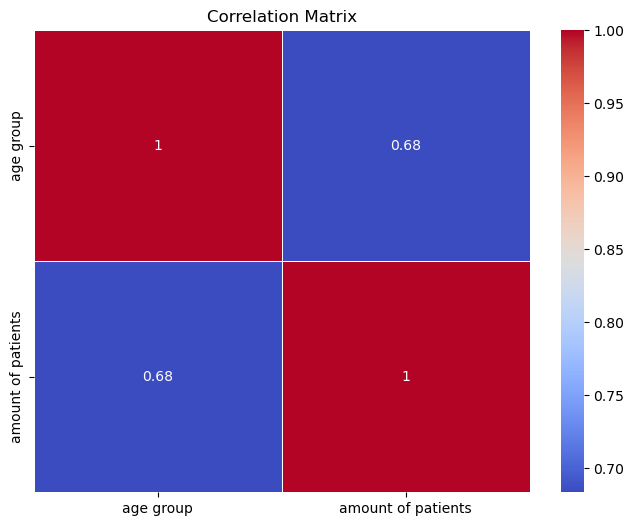

In [458]:
# Import dependencies 
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the columns that interest us
data = {'age group': age_stroke.index,
        'amount of patients': age_stroke.values}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title
plt.title('Correlation Matrix')

#Saving the image
plt.savefig("corr_mat_age.png")

# Display the plot
plt.show()

This correlation matrix shows the correlation coeffitients between the two sets of variables, the color intensity and annotation values indicate the strength and direction of the correlation.

Interpreting the correlation matrix:
Looking at the correlation matrix heatmap, each cell represents the correlation coefficient between two variables. The diagonal cells represent the correlation of a variable with itself, which is always 1

Correlation Coefficient Value:

Close to 1: A correlation coefficient value close to 1 indicates a strong positive correlation between the variables.

Close to -1: A correlation coefficient value close to -1 indicates a strong negative correlation between the variables.

Close to 0: A correlation coefficient value close to 0 indicates a weak or no correlation between the variables.

In [261]:
#We se how the previous values would go in ascending order

age_stroke=age_stroke.sort_values()
age_stroke

14     1
32     1
38     1
42     1
43     1
46     1
47     1
53     2
52     2
55     2
48     2
65     2
64     2
45     3
75     3
51     3
56     3
50     3
49     3
67     3
66     3
39     3
73     4
60     4
61     4
58     4
76     5
71     5
72     5
59     6
69     6
70     6
54     6
77     7
63     7
74     7
82     9
68     9
57    10
79    13
81    14
78    16
80    16
Name: age, dtype: int64

To visualize the distribution of age we use a histogram

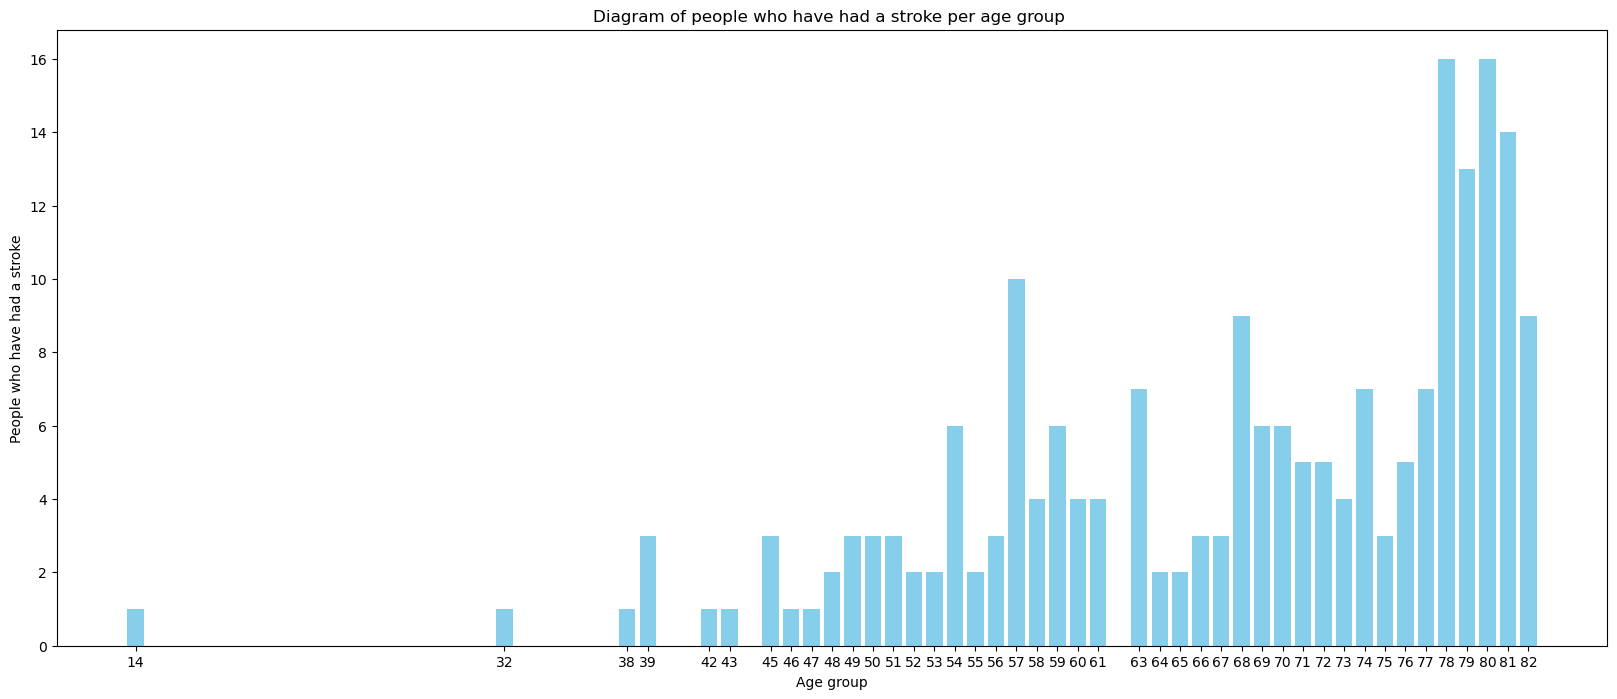

In [457]:
# Set the size of the plot
plt.figure(figsize=(20, 8))

# Name the labels of the plot
plt.xlabel('Age group')
plt.ylabel('People who have had a stroke')
plt.title('Diagram of people who have had a stroke per age group ')

# Plotting the bar plot
plt.bar(age_stroke.index, age_stroke.values, color="skyblue")
plt.xticks(age_stroke.index, age_stroke.index)

# Saving the image
plt.savefig("age_stroke_bar.png")

# Displayng the plot
plt.show()

Age Group Analysis:

Age Group with the Most Patients: The age group with the highest number of patients is 78, followed by 80 and 81.

Age Group with the Fewest Patients: The age groups with the fewest patients are 14, 32, 38, 42, 43, 46, and 47, each having only 1 patient.


In [241]:
# Statistical analisis of the data

age_stroke.describe()

count    43.000000
mean      4.860465
std       3.979599
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      16.000000
Name: age, dtype: float64

# Is being married a key factor in increasing the probability of having a stroke? 

In [ ]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
# Visualizing the data 
married = data_new['ever_married'].value_counts()
married

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [252]:
stroke = data_new['stroke'].value_counts()
stroke

0    4699
1     209
Name: stroke, dtype: int64

In [291]:
# Visualizing the relationship between the variables

data_new.groupby('ever_married')['stroke'].value_counts()


ever_married  stroke
No            0         1681
              1           23
Yes           0         3018
              1          186
Name: stroke, dtype: int64

We can see that double the amount of patients have been married 

The group of patients who've been married has the most cases of stroke

To see whether if this is significant we need to see the percentage of patients who have had a stroke in relationship with the size of the group

In [436]:
# We create a new dataframe with the columns that concern us

new_df = data_new[['ever_married', 'stroke']]
new_df

,ever_married,stroke
0,No,0
1,Yes,0
2,No,0
3,No,0
4,No,0
...,...,...
4903,Yes,0
4904,No,0
4905,Yes,0
4906,Yes,1


Making a plot to visualize the relationship between the variables

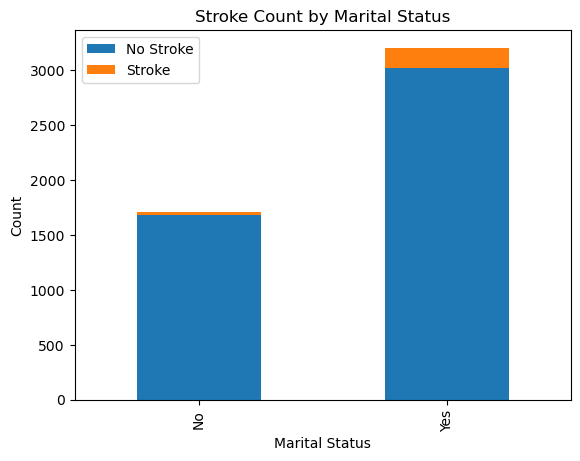

In [459]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by status and calculate the stroke count for each category
grouped = new_df.groupby('ever_married')['stroke'].value_counts().unstack()

# Plot the bar chart
grouped.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Stroke Count by Marital Status')
plt.legend(['No Stroke', 'Stroke'])
 
# Saving the image
plt.savefig("bar_stroke_age.png")
    
# Display the plot
plt.show()

We make a pie chart to see the percentages that correspong each group to better undertand the relationship between the values

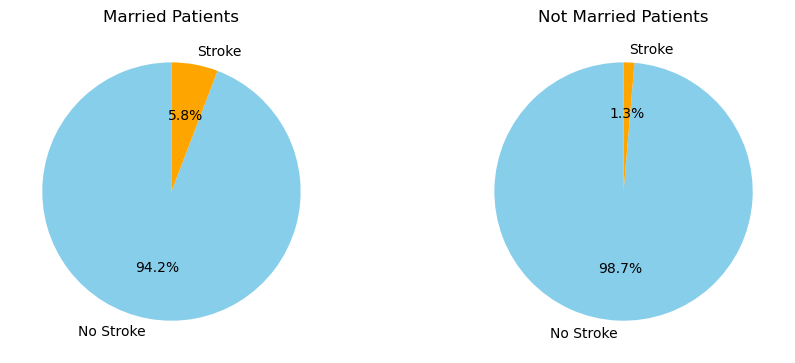

In [460]:
# Group the data by status and calculate the stroke count for each category
grouped = new_df.groupby('ever_married')['stroke'].value_counts().unstack()

# Get the counts for each category
married_counts = grouped.loc['Yes'].values
not_married_counts = grouped.loc['No'].values

# Get the total counts for each category
married_total = married_counts.sum()
not_married_total = not_married_counts.sum()

# Calculate the percentages of strokes for each category
married_percentages = married_counts / married_total * 100
not_married_percentages = not_married_counts / not_married_total * 100

# Define custom colors
colors = ['skyblue', 'orange']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for married patients
axes[0].pie(married_percentages, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Married Patients')

# Plot the pie chart for not married patients
axes[1].pie(not_married_percentages, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Not Married Patients')

# Set equal aspect ratio to ensure circular shape
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Saving the image
plt.savefig("pie_marry.png")

# Display the plot
plt.show()

We can see that the Marital status does not affect significantly whether if a patient is more likely to have a stroke or not